<a href="https://colab.research.google.com/github/GauravGupta7/project_S/blob/master/MNIST_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are working upon the MNIST dataset and we are using the concept of Logistic Regression for Image Classification using Pytorch.

In [52]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.nn.functional as F

In [53]:
# Download training dataset
dataset = MNIST(root='data/', download=True)
len(dataset)

60000

In [54]:
# Download the test dataset
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [55]:
# Getting a sample element of test dataset
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FBA0CC37390>, 5)

To get an image like view of the dataset elements, we need to use the matplotlib of python

Label: 5


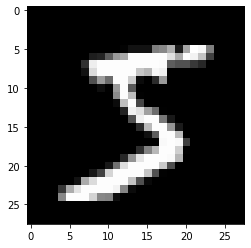

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


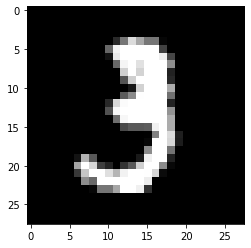

In [57]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [58]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [59]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [60]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


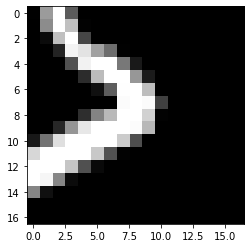

In [61]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:27,10:27], cmap='gray');

In [62]:
# Creating a random validation dataset
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [63]:
# Creating DataLoader of Batch Size 128
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

**Creating the model**

In [64]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [65]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0182, -0.0235,  0.0046,  ...,  0.0048, -0.0046, -0.0251],
        [-0.0200, -0.0204,  0.0176,  ..., -0.0002,  0.0070, -0.0274],
        [ 0.0257,  0.0140, -0.0280,  ...,  0.0180, -0.0003, -0.0294],
        ...,
        [-0.0111,  0.0149, -0.0074,  ...,  0.0186,  0.0276, -0.0102],
        [ 0.0316, -0.0031,  0.0184,  ...,  0.0194,  0.0235, -0.0097],
        [ 0.0318,  0.0093, -0.0178,  ...,  0.0137,  0.0111, -0.0295]],
       requires_grad=True)

In [66]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0222,  0.0079, -0.0032, -0.0057, -0.0066,  0.0338, -0.0221, -0.0336,
        -0.0103,  0.0019], requires_grad=True)

In [67]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [68]:
model.linear
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-3.1923e-02, -2.9511e-02, -3.2874e-02,  ..., -2.6664e-02,
           3.0951e-02, -1.9188e-02],
         [ 1.9700e-02, -4.2558e-03, -2.3279e-02,  ..., -2.7873e-02,
          -3.3649e-02,  3.3369e-03],
         [-1.0266e-02, -6.7876e-04, -3.4777e-02,  ...,  1.1967e-02,
           1.3576e-02,  1.1667e-02],
         ...,
         [ 1.1817e-02, -2.0719e-02, -3.1791e-03,  ..., -4.4120e-05,
          -2.1086e-03,  1.5463e-02],
         [ 3.6112e-03,  2.0244e-02,  3.1670e-02,  ..., -4.0340e-03,
          -1.1622e-02, -1.7415e-02],
         [-1.9122e-03,  4.6136e-03,  4.2830e-03,  ...,  2.8597e-02,
           7.0588e-03, -6.0618e-03]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0176, -0.0334, -0.0181,  0.0059, -0.0089, -0.0186, -0.0173, -0.0115,
         -0.0045,  0.0199], requires_grad=True)]

In [69]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1243, -0.0160, -0.0763,  0.0199, -0.0690, -0.1118,  0.2047,  0.0855,
          0.0757,  0.0049],
        [ 0.2737, -0.1278, -0.1217, -0.1193, -0.0175,  0.2445,  0.2783,  0.0635,
         -0.0028,  0.1197]])


In [70]:
outputs[:2]

tensor([[-0.1243, -0.0160, -0.0763,  0.0199, -0.0690, -0.1118,  0.2047,  0.0855,
          0.0757,  0.0049],
        [ 0.2737, -0.1278, -0.1217, -0.1193, -0.0175,  0.2445,  0.2783,  0.0635,
         -0.0028,  0.1197]], grad_fn=<SliceBackward>)

In [71]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0879, 0.0980, 0.0923, 0.1016, 0.0929, 0.0891, 0.1222, 0.1085, 0.1074,
         0.1001],
        [0.1224, 0.0820, 0.0825, 0.0826, 0.0915, 0.1189, 0.1230, 0.0992, 0.0929,
         0.1050]])
Sum:  0.9999999403953552


In [72]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 6, 8, 4, 5, 7, 4, 5, 4, 6, 7, 9, 7, 6, 4, 4, 2, 4, 5, 4, 5, 5, 0, 5,
        6, 2, 6, 1, 8, 0, 1, 4, 9, 0, 0, 2, 9, 4, 1, 8, 2, 5, 6, 5, 7, 4, 7, 6,
        9, 6, 4, 7, 5, 6, 7, 6, 6, 7, 8, 6, 6, 5, 4, 7, 7, 6, 6, 4, 4, 5, 4, 7,
        4, 7, 0, 0, 3, 4, 0, 5, 6, 5, 0, 0, 0, 9, 0, 0, 6, 6, 6, 2, 1, 0, 6, 5,
        2, 2, 1, 6, 5, 5, 5, 4, 2, 6, 7, 5, 0, 7, 4, 0, 6, 4, 7, 0, 6, 6, 0, 4,
        4, 6, 8, 6, 7, 2, 0, 6])
tensor([0.1222, 0.1230, 0.1271, 0.1215, 0.1195, 0.1220, 0.1343, 0.1179, 0.1187,
        0.1293, 0.1234, 0.1375, 0.1190, 0.1223, 0.1328, 0.1199, 0.1417, 0.1191,
        0.1340, 0.1180, 0.1302, 0.1147, 0.1699, 0.1207, 0.1155, 0.1370, 0.1098,
        0.1102, 0.1257, 0.1586, 0.1176, 0.1520, 0.1331, 0.1362, 0.1145, 0.1158,
        0.1135, 0.1105, 0.1190, 0.1277, 0.1144, 0.1096, 0.1558, 0.1274, 0.1131,
        0.1320, 0.1147, 0.1324, 0.1283, 0.1295, 0.1383, 0.1268, 0.1207, 0.1373,
        0.1167, 0.1245, 0.1175, 0.1215, 0.1232, 0.1151, 0.1270, 0.1358, 0.1239,
       

In [73]:
labels

tensor([1, 2, 4, 8, 7, 5, 9, 6, 6, 1, 6, 7, 4, 6, 8, 6, 2, 0, 3, 7, 8, 3, 0, 7,
        8, 8, 4, 1, 3, 0, 8, 9, 7, 0, 2, 9, 7, 3, 8, 5, 9, 4, 9, 9, 1, 9, 9, 6,
        7, 1, 4, 9, 3, 2, 7, 5, 9, 9, 6, 1, 1, 3, 0, 5, 9, 3, 1, 4, 4, 3, 5, 7,
        3, 5, 0, 0, 5, 9, 0, 0, 1, 3, 0, 0, 5, 7, 0, 0, 2, 9, 1, 2, 1, 0, 3, 9,
        6, 5, 2, 5, 4, 6, 0, 8, 6, 3, 9, 8, 0, 9, 4, 0, 1, 7, 4, 4, 4, 6, 0, 0,
        7, 1, 7, 1, 9, 5, 0, 1])

# **Evaluating Metric and Loss Function**

In [74]:
torch.sum(preds == labels)

tensor(28)

In [75]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [76]:
accuracy(outputs, labels)

tensor(0.2188)

In [77]:
probs

tensor([[0.0879, 0.0980, 0.0923,  ..., 0.1085, 0.1074, 0.1001],
        [0.1224, 0.0820, 0.0825,  ..., 0.0992, 0.0929, 0.1050],
        [0.1028, 0.1011, 0.0762,  ..., 0.1139, 0.1271, 0.0913],
        ...,
        [0.1104, 0.0916, 0.1149,  ..., 0.1012, 0.1071, 0.0837],
        [0.1438, 0.1118, 0.0821,  ..., 0.0934, 0.0941, 0.0888],
        [0.0911, 0.0959, 0.1019,  ..., 0.0910, 0.1057, 0.0978]],
       grad_fn=<SoftmaxBackward>)

In [78]:
#Defining the loss function and calculating the loss for current batch of data
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2409, grad_fn=<NllLossBackward>)


# **TRAINING THE MODEL**

In [79]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [80]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [81]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [82]:
#Getting result for first prediction
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.16346915066242218, 'val_loss': 2.2853896617889404}

In [83]:
#Training the model for several epochs so as to increase the model's accuracy
history1 = fit(5, 0.001, model, train_loader, val_loader)
history2 = fit(5, 0.001, model, train_loader, val_loader)
history3 = fit(5, 0.001, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9248, val_acc: 0.6247
Epoch [1], val_loss: 1.6592, val_acc: 0.7368
Epoch [2], val_loss: 1.4609, val_acc: 0.7728
Epoch [3], val_loss: 1.3112, val_acc: 0.7903
Epoch [4], val_loss: 1.1963, val_acc: 0.8014
Epoch [0], val_loss: 1.1059, val_acc: 0.8137
Epoch [1], val_loss: 1.0334, val_acc: 0.8199
Epoch [2], val_loss: 0.9740, val_acc: 0.8249
Epoch [3], val_loss: 0.9246, val_acc: 0.8295
Epoch [4], val_loss: 0.8827, val_acc: 0.8337
Epoch [0], val_loss: 0.8468, val_acc: 0.8377
Epoch [1], val_loss: 0.8158, val_acc: 0.8403
Epoch [2], val_loss: 0.7885, val_acc: 0.8435
Epoch [3], val_loss: 0.7645, val_acc: 0.8453
Epoch [4], val_loss: 0.7431, val_acc: 0.8480
Epoch [0], val_loss: 0.7238, val_acc: 0.8504
Epoch [1], val_loss: 0.7064, val_acc: 0.8517
Epoch [2], val_loss: 0.6907, val_acc: 0.8539
Epoch [3], val_loss: 0.6763, val_acc: 0.8553
Epoch [4], val_loss: 0.6631, val_acc: 0.8563


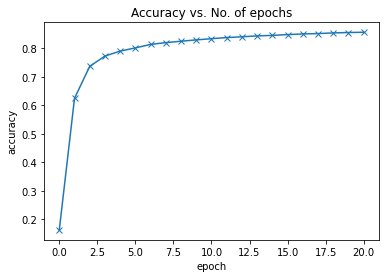

In [84]:
# Visualising the models improvement graphically
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# **Testing with individual images**

In [85]:
# Defining test dataset 
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


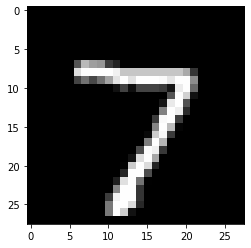

In [86]:
# Getting a sample image from the dataset
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Here we define a helper function which returns a predicted label for a single image tensor

In [87]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


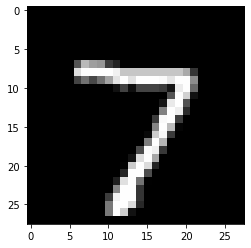

In [88]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


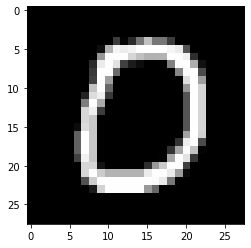

In [89]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


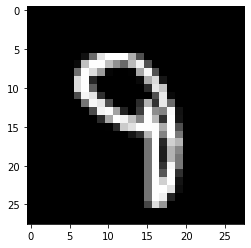

In [90]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


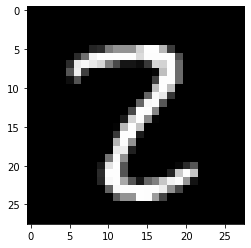

In [91]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [92]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8599609136581421, 'val_loss': 0.6400512456893921}

# **Saving and loading the model**
Since the model is ready and has achieved a satifactory accuracy, we are ready to save and load the model. 

In [93]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [94]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0150, -0.0315, -0.0159,  ..., -0.0200,  0.0202,  0.0204],
                      [ 0.0243,  0.0224,  0.0311,  ..., -0.0295,  0.0048,  0.0105],
                      [-0.0280,  0.0153, -0.0007,  ..., -0.0181,  0.0077, -0.0196],
                      ...,
                      [-0.0335,  0.0327, -0.0244,  ...,  0.0266,  0.0356,  0.0101],
                      [ 0.0090,  0.0196,  0.0198,  ..., -0.0343, -0.0090,  0.0218],
                      [-0.0279, -0.0262, -0.0335,  ...,  0.0198, -0.0264,  0.0028]])),
             ('linear.bias',
              tensor([-0.0175,  0.0830, -0.0025, -0.0173,  0.0541,  0.0416, -0.0030,  0.0592,
                      -0.0874, -0.0134]))])

In [95]:
model2 = MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0146,  0.0161,  0.0220,  ...,  0.0312, -0.0350,  0.0231],
                      [-0.0084, -0.0333, -0.0156,  ..., -0.0171,  0.0320, -0.0074],
                      [-0.0159,  0.0032,  0.0080,  ..., -0.0312, -0.0176,  0.0239],
                      ...,
                      [ 0.0005, -0.0212, -0.0053,  ...,  0.0152, -0.0322,  0.0293],
                      [ 0.0182, -0.0277,  0.0036,  ..., -0.0191,  0.0037,  0.0161],
                      [-0.0184, -0.0037, -0.0005,  ..., -0.0184,  0.0069,  0.0163]])),
             ('linear.bias',
              tensor([-0.0257,  0.0233, -0.0248, -0.0173,  0.0298,  0.0020, -0.0144, -0.0101,
                       0.0031, -0.0235]))])

In [96]:
evaluate(model2, test_loader)

{'val_acc': 0.07294921576976776, 'val_loss': 2.3150277137756348}

In [97]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0150, -0.0315, -0.0159,  ..., -0.0200,  0.0202,  0.0204],
                      [ 0.0243,  0.0224,  0.0311,  ..., -0.0295,  0.0048,  0.0105],
                      [-0.0280,  0.0153, -0.0007,  ..., -0.0181,  0.0077, -0.0196],
                      ...,
                      [-0.0335,  0.0327, -0.0244,  ...,  0.0266,  0.0356,  0.0101],
                      [ 0.0090,  0.0196,  0.0198,  ..., -0.0343, -0.0090,  0.0218],
                      [-0.0279, -0.0262, -0.0335,  ...,  0.0198, -0.0264,  0.0028]])),
             ('linear.bias',
              tensor([-0.0175,  0.0830, -0.0025, -0.0173,  0.0541,  0.0416, -0.0030,  0.0592,
                      -0.0874, -0.0134]))])

In [98]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.8599609136581421, 'val_loss': 0.6400512456893921}